In [1]:
import numpy as np

In [2]:
def get_ci_95(data1, data2):
    """
    Function to get 95 percentile of Aggregation propensity
    Aggregation propensity is defined as: <SASA_agg>_i/<SASA_agg>_native
    data1: SASA array of MSM state
    data2: SASA array of the native state
    """
    nboot = 100000
    agg_vals = np.zeros(nboot)

    for i in range(nboot):
        data1_random = np.random.choice(data1, size=len(data1))
        data2_random = np.random.choice(data2, size=len(data2))
        agg_vals[i] = np.mean(data1_random)/np.mean(data2_random) - 1

    mean = np.mean(data1)/np.mean(data2) -1
    lower_bound = np.percentile(agg_vals, 2.5)
    upper_bound = np.percentile(agg_vals, 97.5)

    return [mean, lower_bound, upper_bound]


In [5]:
native = np.load('SASA_agg_states/sasa_agg_state_5.npy')
agg_data = np.zeros((5,3))
for i in range(5):
    msm = np.load(f'SASA_agg_states/sasa_agg_state_{i}.npy')
    agg_data[i,:] = get_ci_95(msm, native)
    print(f"{i}: {agg_data[i,:]}")

0: [0.01591423 0.0095043  0.02230793]
1: [0.04678213 0.03734973 0.05624945]
2: [-0.00979714 -0.01340647 -0.00619987]
3: [0.12145884 0.10721573 0.13598954]
4: [0.0129341  0.00075824 0.02534068]


In [6]:
agg_data

array([[ 0.01591423,  0.0095043 ,  0.02230793],
       [ 0.04678213,  0.03734973,  0.05624945],
       [-0.00979714, -0.01340647, -0.00619987],
       [ 0.12145884,  0.10721573,  0.13598954],
       [ 0.0129341 ,  0.00075824,  0.02534068]])

In [16]:
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [38]:
# Matplotlib setting
fontsize = 12 # set variable for fontsize
linewidth = 2 # set variable for line width
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.sans-serif'] = ['Arial']
matplotlib.rcParams['axes.labelsize'] = 'small'
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['lines.markersize'] = 4
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['xtick.labelsize'] = 'x-small'
matplotlib.rcParams['ytick.labelsize'] = 'x-small'
matplotlib.rcParams['legend.fontsize'] = 'x-small'
# matplotlib.rcParams['figure.dpi'] = 600

In [21]:
# Extracting means, lower bounds, and upper bounds
means = agg_data[:, 0]*100
lower_bounds = agg_data[:, 1]*100
upper_bounds = agg_data[:, 2]*100

# Calculate error bars (difference between the mean and the lower/upper bounds)
error = [means - lower_bounds, upper_bounds - means]
p_values = [0.0001875, 0.0, 0.0, 0.0, 0.1229]

/tmp/ipykernel_160451/3414317337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=np.arange(len(means)), y=means, errorbar=None, width=0.4, palette=["orange"]*len(means))


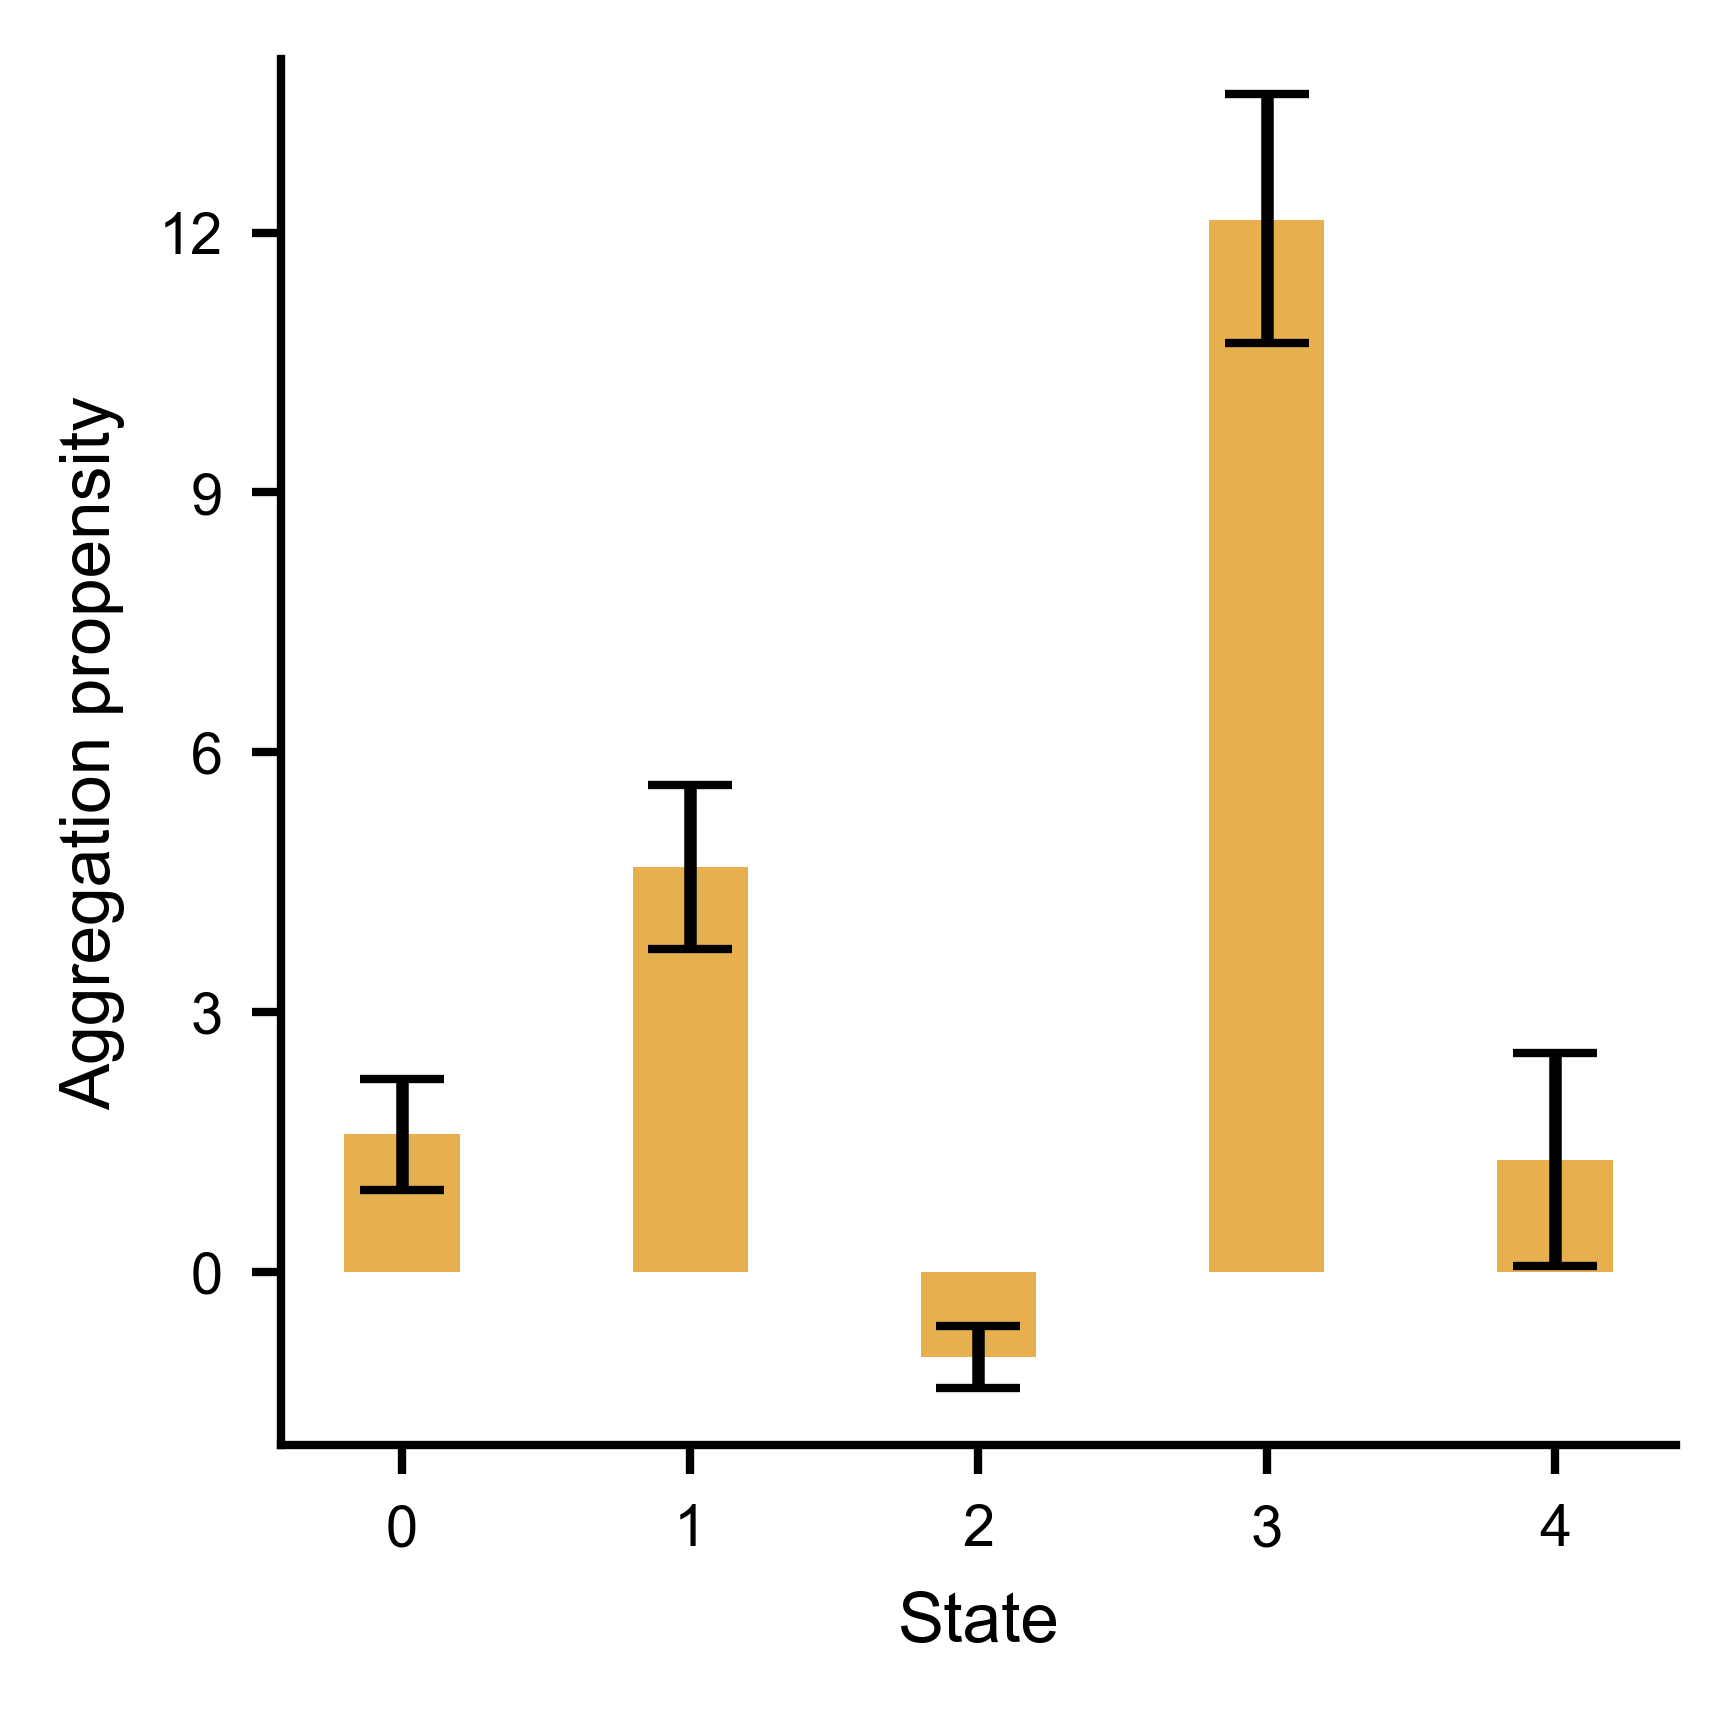

In [52]:
# Plotting
plt.figure(figsize=(3, 3))
ax = sns.barplot(x=np.arange(len(means)), y=means, errorbar=None, width=0.4, palette=["orange"]*len(means))

# Adding error bars
ax.errorbar(x=np.arange(len(means)), y=means, yerr=error, fmt='none', c='black', capsize=5)

# Customizing the plot
ax.set_xlabel('State')
ax.set_ylabel('Aggregation propensity')
ax.set_yticks(np.arange(-3,15,3))
ax.set_ylim(-2, 14)
ax.set_xticks(np.arange(len(means)))
ax.set_xticklabels(np.arange(len(means)))

# Hide the upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Setting the opacity of the bars
for bar in ax.patches:
    bar.set_alpha(0.8)

# Adding p-values and stars
# for i, (mean, p_value) in enumerate(zip(means, p_values)):
# #     y = mean + error[1][i] + 0.01  # position the text slightly above the error bar
#     if p_value <= 0.05 and p_value >= 0.00001:
#         ax.text(i, 14, '*', ha='center', va='bottom', color='black', fontsize=8)
#     elif p_value < 0.00001:
#         ax.text(i, 14, '*', ha='center', va='bottom', color='black', fontsize=8)
#     else:
#         ax.text(i, y, f'{p_value:.1E}', ha='center', va='bottom', color='black', fontsize=8)

plt.savefig('Aggregation_MSM.png', dpi=1000)
# Display the plot
plt.show()